# Importando as bibliotecas...

In [2]:
import numpy as np
import math as mt
import sympy as sp
import inspect
import re 
import altair as alt
from numpy import cos, sin, exp
import sys
import random
import time
import Funcoes.interpolacao as interpolacao
import Funcoes.solucao_de_sistemas_lineares as sistemaslineares
import pandas as pd


# Interpolação Numérica

Interpolar uma função f(x) consiste em aproximar essa função por uma outra função g(x), escolhida entre uma classe de funções definida a priori e que satisfaça algumas propriedades. A função g(x) é usada em substituição à função f(x).

## O conceito de interpolação numérica

consideremos (n+1) pontos distintos: x0, x1, ..., xn, chamados nós da interpolação, e os valores de f(x) nesses pontos: f(x0), f(x1), ..., f(xn).

A forma de interpolação de f(x) que veremos a seguir consiste em se obter uma determinada função g(x) tal que:

g(x0) = f(x0)

g(x1) = f(x1)

g(x2) = f(x2)

...

g(xn) = f(xn)

!obs: nos nós da interpolação as funções f(x) e g(x) assumem os mesmos valores

## Interpolação Polinomial

A matriz V é uma matriz de Vandermonde e, portanto desde que x0, x1, x2, ...., xn sejam
pontos distintos temos det (V)=0. Portanto, o sistema acima admite solução única. A matriz
coluna a é a matriz das incógnitas e a matriz coluna f é a das constantes f(xi)=yi

**teorema**: existe um único polinômio pn(x), de grau <= n, tal que: pn(xk) = f(xk), k = 0, 1, 2, ..., desde que xk =/ xj, j =/ k.

## Interpolação Linear

In [2]:
i = pd.DataFrame({
    'x' : [0.1, 0.6],
    'y' : [1.221, 3.320]
})


grafico_linear = alt.Chart(i).mark_line(line=True, point=True).encode(
    alt.X('x').scale(domain=(0,1)),
    y='y',
    tooltip = ['x','y']
)

print(0.2, interpolacao.Plinear(x=0.2, x0=i.x[0], x1=i.x[1], y1=i.y[1], y0=i.y[0]))
print(0.3, interpolacao.Plinear(x=0.3, x0=i.x[0], x1=i.x[1], y1=i.y[1], y0=i.y[0]))
grafico_linear

0.2 1.6408
0.3 2.0606


alt.Chart(...)

## Interpolação Quadrática

In [5]:
'''Obs. Para encontrarmos os coeficientes ai temos que resolver esse sistema de equações.
Podemos por exemplo utilizar o método direto de eliminação de Gauss (triangularizar a matriz
sanduíche) ou adotar métodos iterativos para resolver esse sistema de equações como, por
exemplo, os métodos de Gauss-Jacobi e o de Gauss-Seidel. '''


i = pd.DataFrame({
    'x' : [0.1, 0.6, 0.8],
    'y' : [1.221, 3.320, 4.953]
})


grafico_linear = alt.Chart(i).mark_line(line=True, point=True).encode(
    alt.X('x').scale(domain=(0,1)),
    y='y',
    tooltip = ['x','y']
)
grafico_linear

#os coeficientes do polinômio interpolador são determinados pela solução do sistema linear:
teste = interpolacao.matriz_inter_quadratica(i)

#resolvendo o polinômio interpolador são determinados pela solução do sistema linear:
solucao = sistemaslineares.eliminacaoGaussianaParcial(data=teste)

print("P(0.2) = ",interpolacao.Pquadratica(coeficientes=solucao[2][::-1], x=0.2))


P(0.2) =  1.4141228571428572


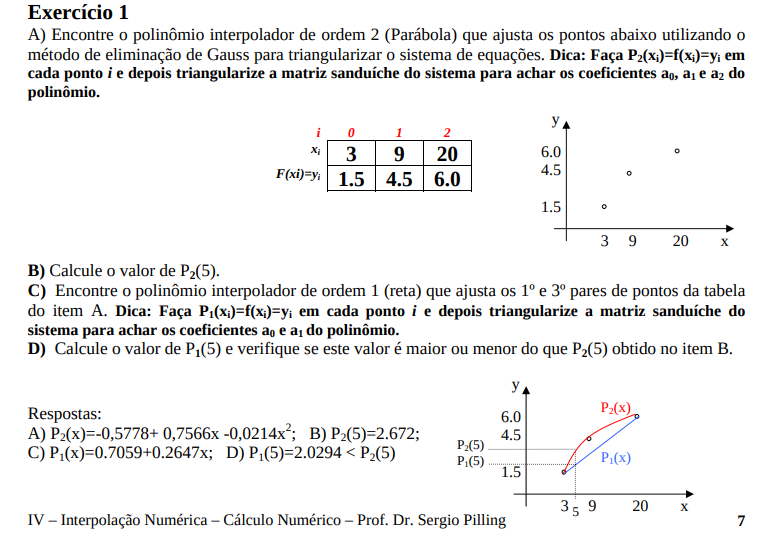

# Interpolação Polinomial
 Encontrar um polinômio interpolador a partir da resolução de um sistema de equações
para ordens maiores do que a estudada acima pode ser muito trabalhoso. Iremos aprender a
seguir, duas metodologias (de Lagrange e de Newton) para encontrarmos os polinômios
interpoladores de qualquer ordem sem termos que resolver sistemas de equações. 

## Forma de Lagrange

## Método de interpolação de Lagrange

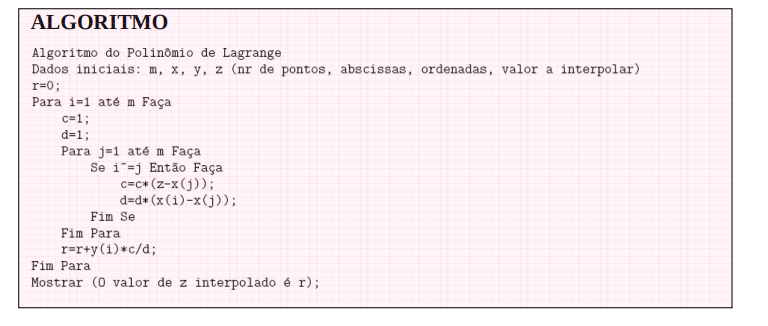

In [2]:
x = [1, 2, 3, 4]
#y = [10, 29, 90]

'''Considerando um função do tipo f(x)= 5x + ln(x+1), escreva o polinômio interpolador de
Lagrange de ordem 3 passando que passa pelos pontos x=1, 2, 3 e 4. Calcule P3(1.1) e P3 (1.2). '''

f = lambda x : 5*x + mt.log(x+1)
y = []

for i in x:
    y.append(f(i))
print(y)

print("P(1.1) = ",interpolacao.PolinomioLagrange(x, y, 1.1))
print("P(1.2) = ",interpolacao.PolinomioLagrange(x, y, 1.2))


NameError: name 'mt' is not defined

## Forma de Newton
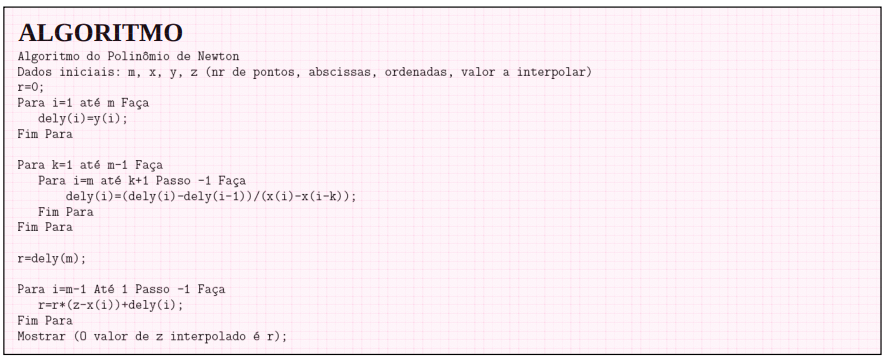

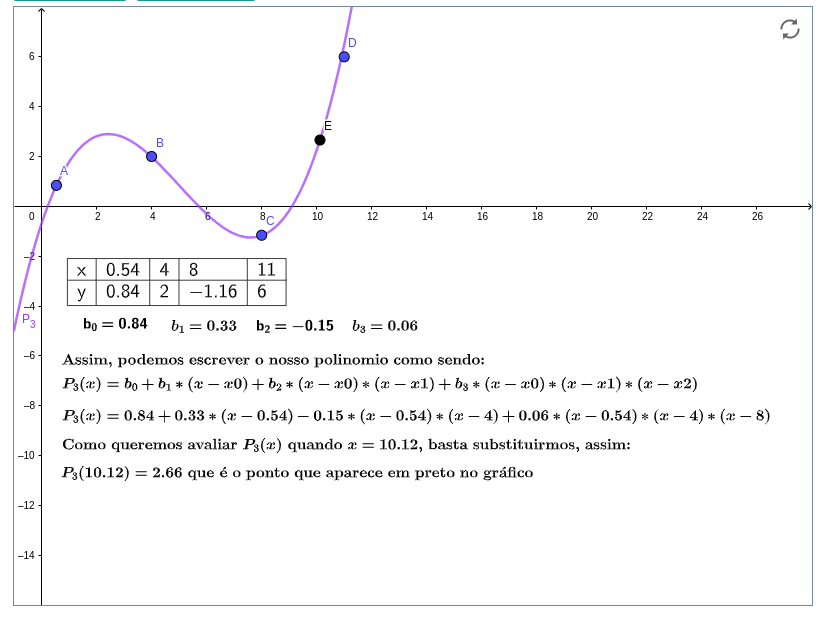

In [3]:
x = [0.54, 4, 8, 11]
y = [0.84, 2, -1.16, 6]

matriz, bs = interpolacao.tabela_diferencas_divididas(x, y)
print("P(10.12) = ", interpolacao.polinomioNewton(bs, 10.12, x))

0.84
0.33526011560693647
(10.12 - 0.54)
-0.15083915758806118
(10.12 - 0.54)
(10.12 - 4)
0.05780580128083986
(10.12 - 0.54)
(10.12 - 4)
(10.12 - 8)
P(10.12) =  2.39311016815273
